In [1]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

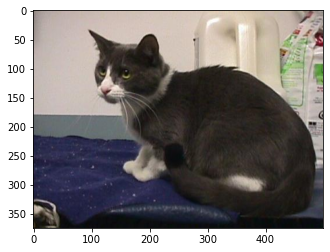

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')

In [7]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

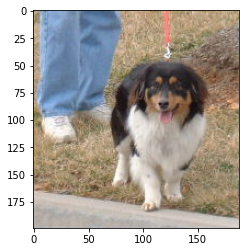

In [8]:
plt.imshow(dog)

In [9]:
dog.shape

(199, 188, 3)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rotation_range = 30, 
                              width_shift_range=0.1,
                              height_shift_range = 0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

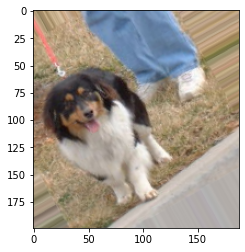

In [12]:
plt.imshow(image_gen.random_transform(dog))

In [13]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [14]:
input_shape = (150,150,3)

In [15]:
from keras.models import Sequential

In [16]:
from keras.layers import Dense,Activation,Dropout, Flatten, Conv2D, MaxPooling2D

In [17]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size =(3,3),input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64,kernel_size =(3,3),input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64,kernel_size =(3,3),input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [19]:
#train the model
batch_size = 16
train_imge_gen = image_gen.flow_from_directory('CATS_DOGS/train/',
                                              target_size = input_shape[:2],
                                              batch_size = batch_size,
                                              class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [20]:
#train the model
batch_size = 16
test_imge_gen = image_gen.flow_from_directory('CATS_DOGS/test/',
                                              target_size = input_shape[:2],
                                              batch_size = batch_size,
                                              class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [21]:
train_imge_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [ ]:
import numpy as np
result = model.fit_generator(train_imge_gen, epochs = 1, steps_per_epoch = 150, 
                            validation_data=test_imge_gen,validation_steps=12)

#%time
#model.fit(np.asarray(images), to_categorical(np.asarray(masks), num_classes=19), 
# steps_per_epoch=119,#len(X_train) // BS
#epochs=50,workers=multiprocessing.cpu_count(),validation_split=0.2)

<ipython-input-24-2c81d8300333>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(train_imge_gen, epochs = 1, steps_per_epoch = 150,


139/150 [==========================>...] - ETA: 12s - loss: 0.6858 - accuracy: 0.5468

In [ ]:
result.history['val_accuracy']

In [ ]:
from keras.models import load_model

In [ ]:
new_model = load_model('cat_dog_100epochs.h5')

In [ ]:
dog_file = 'CATS_DOGS/test/DOG/10005.jpg'

In [ ]:
from keras.preprocessing import image

In [ ]:
dog_img = image.load_img(dog_file,target_size = (150,150)) 

In [ ]:
dog_img = image.img_to_array(dog_img)

In [ ]:
dog_img.shape

In [ ]:
import numpy as np
dog_img = np.expand_dims(dog_img, axis=0)

In [ ]:
dog_img.shape

In [ ]:
dog_img = dog_img/255

In [ ]:
model.predict_classes(dog_img)

In [ ]:
model.predict(dog_img)